# Set the county and subdivision details

In [1]:
# county id
COUNTY_ID = "03"

# county name
COUNTY_NAME = "YELLOWSTONE"

# list of subdivisions to scrape
SUBDIVISIONS = [
    "C.B.H. INDUSTRIAL PARK SUBD",
    "C.H.LUND SUBD",
    "3 I'S PATIO HOMES (06)",
    "49ER CONDO PHASE II",
    "ALDINGER ACRES SUBD 3RD FILING",
    "ALLISON SUBD",
    "BLUEGRASS SUBD 2ND FILING",
]

# Instantiate subdivision objects

In [2]:
# initialize the subdivision objects

from data_extractor import Subdivision

subdivision_objects = []
for name in SUBDIVISIONS:
    subdivision_objects.append(Subdivision(name=name, county_id=COUNTY_ID, county_name=COUNTY_NAME))

# Extract list of properties for each subdivision

In [3]:
# fetch all properties for each subdivision
for subdivision in subdivision_objects:
    subdivision.fetch_properties()

url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=C.B.H. INDUSTRIAL PARK SUBD&countyid=03 took 17.99 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=C.H.LUND SUBD&countyid=03 took 8.13 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=3 I'S PATIO HOMES (06)&countyid=03 took 7.78 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=49ER CONDO PHASE II&countyid=03 took 7.66 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=ALDINGER ACRES SUBD 3RD FILING&countyid=03 took 8.37 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=ALLISON SUBD&countyid=03 took 4.67 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/search/searchbysubdivision?subdivision=BLUEGRASS SUBD 2ND FILING&countyid=03 took 13.93 seconds


# Aggregate properties from all subdivisions in a single list

In [7]:
# extract property details from the property html

from data_extractor import PropertyExtractor

initial_property_data_list = []

for subdivision in subdivision_objects:
    property_extractor = PropertyExtractor(subdivision.properties_html)
    initial_property_data_list.extend(property_extractor.extract_properties())

# Save the initial property data to a csv file

In [8]:
import pandas as pd

# initialize a dataframe with the initial property data
initial_df = pd.DataFrame(initial_property_data_list)

# save initial property data to a csv file
initial_df.to_csv("initial_property_data.csv", index=False)

# output the df
initial_df

,Owner Name,Geocode,Address,Legal Description
0,SHEN PROPERTIES LLC,03-0927-07-4-01-02-0000,"1911 KING AVE W BILLINGS, MT 59102","C.B.H. INDUSTRIAL PARK SUBD, S07, T01 S, R26 E..."
1,"STENBERG PROPERTIES, LLC",03-0927-07-4-01-11-0000,"765 S 20TH ST W BILLINGS, MT 59102","C.B.H. INDUSTRIAL PARK SUBD, S07, T01 S, R26 E..."
2,WEST END PROPERTIES LLP,03-0927-07-4-01-03-0000,"710-12 CARBON ST BILLINGS, MT 59102","C.B.H. INDUSTRIAL PARK SUBD, S07, T01 S, R26 E..."
3,"HUSTON, BRIAN & DONNA",03-0926-04-2-19-02-0000,"1115 56TH ST W BILLINGS, MT 59106","C.H.LUND SUBD, S04, T01 S, R25 E, BLOCK 1, Lot..."
4,J&D SULLIVAN TRUST,03-0926-04-2-19-03-0000,"1165 56TH ST W BILLINGS, MT 59106","C.H.LUND SUBD, S04, T01 S, R25 E, BLOCK 1, Lot..."
5,"ENGLEHART, MICHAEL S & JEANETTE",03-1032-33-2-16-06-7001,"2621 WESTFIELD DR BILLINGS, MT 59102","3 I'S, S33, T01 N, R25 E, UNIT 1, 33.33% COMMO..."
6,"HAWKINS, DAVID C & BARBARA K",03-1032-33-2-16-06-7002,"2617 WESTFIELD DR BILLINGS, MT 59102","3 I'S, S33, T01 N, R25 E, UNIT 2, 33.33% COMMO..."
7,"MARTIN, RICHARD D & KIMBERLY",03-1032-33-2-16-06-7000,"WESTFIELD DR BILLINGS, MT 59102","3 I'S, S33, T01 N, R25 E, MASTERCARD (06) LO..."
8,"ROYER, WILLIAM G & LAVERNE K",03-1032-33-2-16-06-7003,"2613 WESTFIELD DR BILLINGS, MT 59102","3 I'S, S33, T01 N, R25 E, UNIT 3, 33.34% COMMO..."
9,49'ER CONDOMINIUM PHASE II THE,03-1033-21-1-10-34-7000,"PROSPECTORS LN BILLINGS, MT 59105","49ER CONDO PHASE II, S21, T01 N, R26 E, MASTER..."


In [11]:
from models import Property
from data_extractor import PropertyHTML

# initialize lists of data frames to hold the property data and time it takes to fetch all data
complete_property_data_list = []
times = []

# for each property in each subdivision
for property in initial_property_data_list:
    # fetch the property geocode
    geocode = property["Geocode"]

    # initialize the propertyhtml object
    property_html = PropertyHTML(geocode)

    # fetch all html content for the property
    property_html.fetch_all_data()

    # add the time_taken by each property to the list
    times.append(property_html.time_taken())

    # initialize the property object
    property_object = Property()
    property_object.populate_from_property_html_object(property_html)

    # add property details to the list
    complete_property_data_list.append(property_object.json())

url: https://svc.mt.gov/msl/legacycadastralapi/summary/getsummarydata?geocode=03-0927-07-4-01-02-0000&year=2023 took 14.55 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/owner/getownerdata?geocode=03-0927-07-4-01-02-0000&year=2023 took 1.06 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/appraisal/getappraisaldata?geocode=03-0927-07-4-01-02-0000&year=2023 took 1.1 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/marketland/getmarketlanddata?geocode=03-0927-07-4-01-02-0000&year=2023 took 1.17 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/dwelling/getdwellingdata?geocode=03-0927-07-4-01-02-0000&year=2023 took 5.12 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/otherbuilding/getotherbuildingdata?geocode=03-0927-07-4-01-02-0000&year=2023 took 2.98 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/commercial/getcommercialdata?geocode=03-0927-07-4-01-02-0000&year=2023 took 2.64 seconds
url: https://svc.mt.gov/msl/legacycadastralapi/agforest/getagfor

In [12]:
# initialize a dataframe with the complete property data
complete_df = pd.DataFrame(complete_property_data_list)

# store as csv
complete_df.to_csv("complete_property_data.csv", index=False)

# output the df
complete_df

,geocode,legal_description,total_market_land,last_modified,property_address,sub_category,subdivision,owners,land_value,building_value,yoY_difference,building_details,other_building_details,market_land_details
0,03-0927-07-4-01-02-0000,"C.B.H. INDUSTRIAL PARK SUBD, S07, T01 S, R26 E...",2.303,10/6/2023 1:55:41 AM,None,Commercial Property,C.B.H. INDUSTRIAL PARK SUBD,"[{'': '3322 37TH ST W', 'Ownership %:': '100',...",1712191,2222209,196247,"[{}, {}, {}, {'Building Number': '1', 'Buildin...","[{'Type': 'Commercial', 'Description': 'CPA1 -...","[{'Method': 'Sqft', 'Type': 'Category 4'}, {'W..."
1,03-0927-07-4-01-11-0000,"C.B.H. INDUSTRIAL PARK SUBD, S07, T01 S, R26 E...",1.341,10/6/2023 1:55:41 AM,None,Commercial Property,C.B.H. INDUSTRIAL PARK SUBD,"[{'': '825 N 27TH ST', 'Ownership %:': '100', ...",424551,695349,-36400,"[{}, {}, {}, {'Building Number': '1', 'Buildin...","[{'Type': 'Commercial', 'Description': 'CRFV -...","[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
2,03-0927-07-4-01-03-0000,"C.B.H. INDUSTRIAL PARK SUBD, S07, T01 S, R26 E...",2.144,10/6/2023 1:55:41 AM,None,Commercial Property,C.B.H. INDUSTRIAL PARK SUBD,"[{'': '710 CARBON ST', 'Ownership %:': '100', ...",659864,1102536,73300,"[{}, {}, {}, {}, {'Building Number': '1', 'Bui...","[{'Type': 'Commercial', 'Description': 'CPA2 -...","[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
3,03-0926-04-2-19-02-0000,"C.H.LUND SUBD, S04, T01 S, R25 E, BLOCK 1, Lot...",0.880,10/6/2023 1:55:41 AM,None,Residential Property,C.H.LUND SUBD,"[{'': '1115 56TH ST W', 'Ownership %:': '100',...",107301,347699,95000,[],"[{'Type': 'Residential', 'Description': 'AAP1 ...","[{'Method': 'Acre', 'Type': 'Primary Site'}, {..."
4,03-0926-04-2-19-03-0000,"C.H.LUND SUBD, S04, T01 S, R25 E, BLOCK 1, Lot...",0.959,10/6/2023 1:55:41 AM,None,Residential Property,C.H.LUND SUBD,"[{'': '1165 56TH ST W', 'Ownership %:': '100',...",111629,482471,98200,[],"[{'Type': 'Residential', 'Description': 'RPA2 ...","[{'Method': 'Acre', 'Type': 'Primary Site'}, {..."
5,03-1032-33-2-16-06-7001,"3 I'S, S33, T01 N, R25 E, UNIT 1, 33.33% COMMO...",0.864,10/6/2023 1:55:41 AM,None,Residential Property,3 I'S PATIO HOMES (06),"[{'': '2621 WESTFIELD DR', 'Ownership %:': '10...",212751,994849,109400,[],"[{'Type': 'Residential', 'Description': 'RRG2 ...","[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
6,03-1032-33-2-16-06-7002,"3 I'S, S33, T01 N, R25 E, UNIT 2, 33.33% COMMO...",0.864,10/6/2023 1:55:41 AM,None,Residential Property,3 I'S PATIO HOMES (06),"[{'': '2617 WESTFIELD DR', 'Ownership %:': '10...",212751,1133249,124100,[],"[{'Type': 'Residential', 'Description': 'RRP3 ...","[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
7,03-1032-33-2-16-06-7000,"3 I'S, S33, T01 N, R25 E, MASTERCARD (06) LO...",0.295,10/6/2023 1:55:41 AM,None,Condo/Townhouse Master,3 I'S PATIO HOMES (06),"[{'': '8 VAN GOGH WAY', 'Ownership %:': '100',...",81640,0,15268,[],[{}],"[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
8,03-1032-33-2-16-06-7003,"3 I'S, S33, T01 N, R25 E, UNIT 3, 33.34% COMMO...",0.897,10/6/2023 1:55:41 AM,None,Residential Property,3 I'S PATIO HOMES (06),"[{'': '2613 WESTFIELD DR', 'Ownership %:': '10...",217591,1080509,187400,[],"[{'Type': 'Residential', 'Description': 'RPA2 ...","[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."
9,03-1033-21-1-10-34-7000,"49ER CONDO PHASE II, S21, T01 N, R26 E, MASTER...",0.298,10/6/2023 1:55:41 AM,None,Condo/Townhouse Master,49ER CONDO PHASE II,"[{'': '201 PROSPECTORS LN', 'Ownership %:': '1...",100318,0,29167,[],[{}],"[{'Method': 'Sqft', 'Type': 'Primary Site'}, {..."


# Plot the distribution of response times for each API call

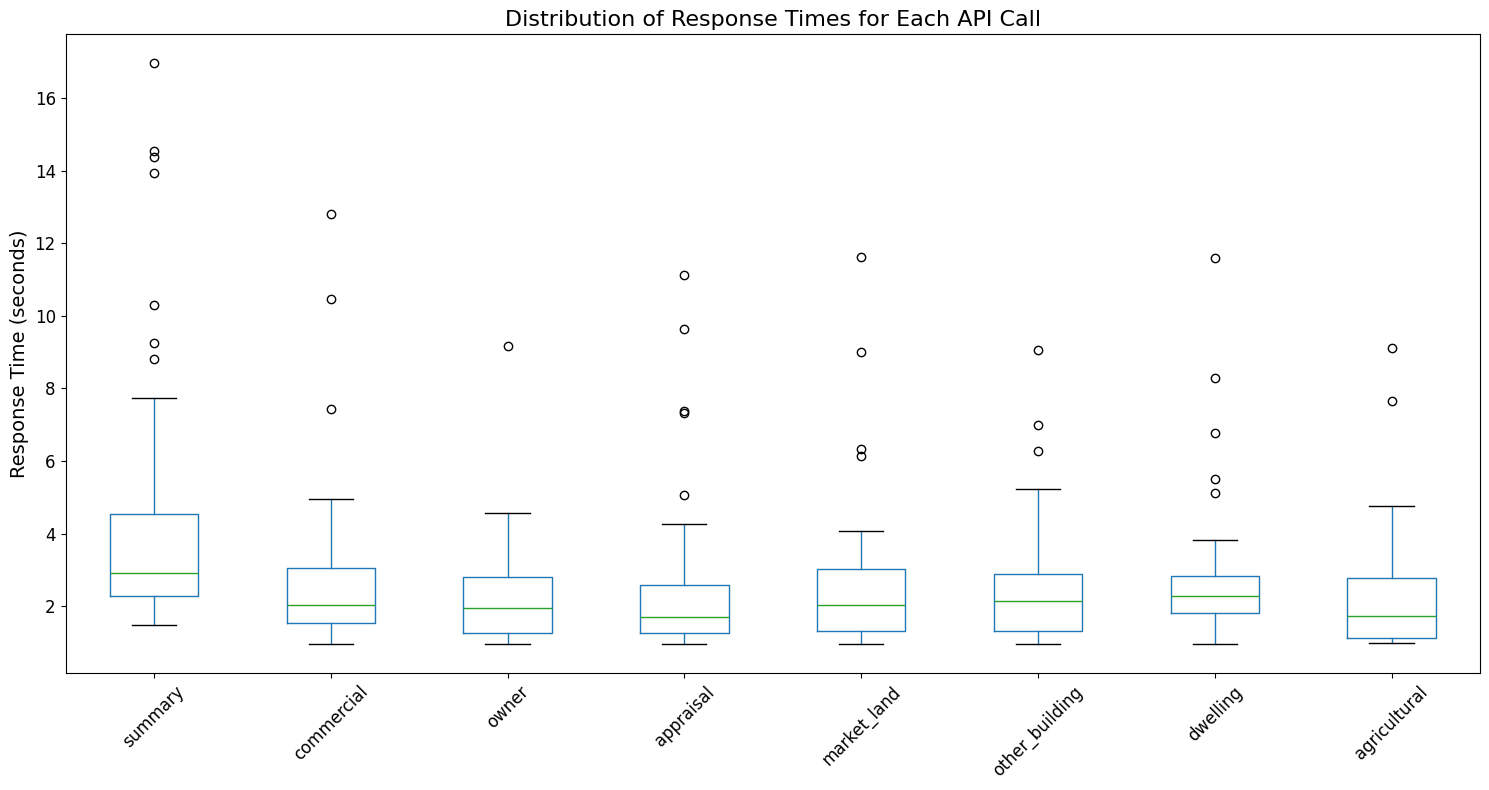

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the data into a pandas DataFrame
df = pd.DataFrame(times)

# Drop the 'Geocode' column as it's not needed for the visualization
df = df.drop(columns='Geocode')

# Create a box plot
plt.figure(figsize=(15, 8))
df.boxplot(grid=False, vert=True, fontsize=12)
plt.ylabel('Response Time (seconds)', fontsize=14)
plt.title('Distribution of Response Times for Each API Call', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the average response time for each API call

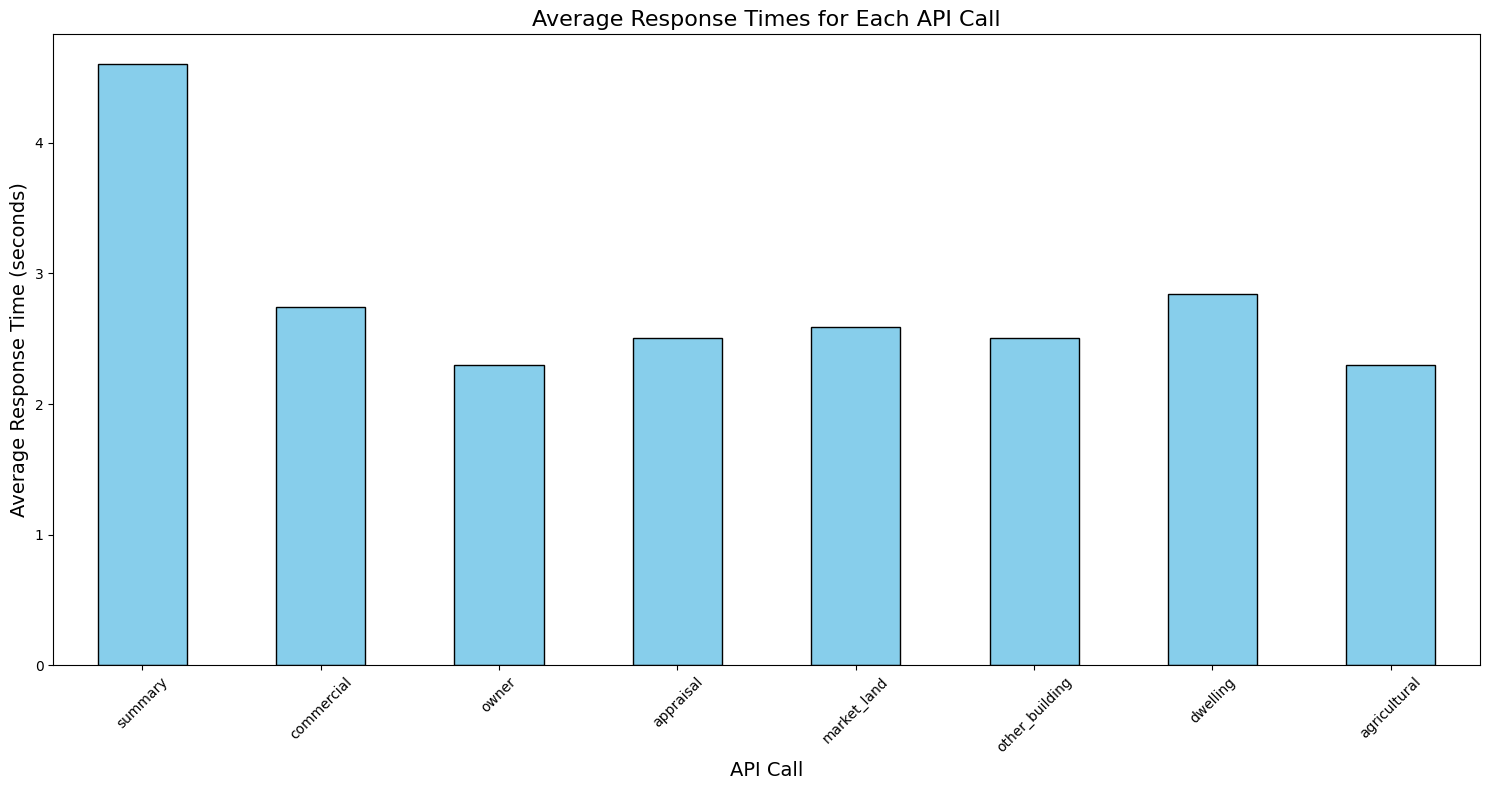

In [14]:
# Calculate the average response time for each API call
average_response_times = df.mean()

# Create a bar chart
plt.figure(figsize=(15, 8))
average_response_times.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Average Response Time (seconds)', fontsize=14)
plt.xlabel('API Call', fontsize=14)
plt.title('Average Response Times for Each API Call', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograms

To understand the frequency distribution of response times for each api call.

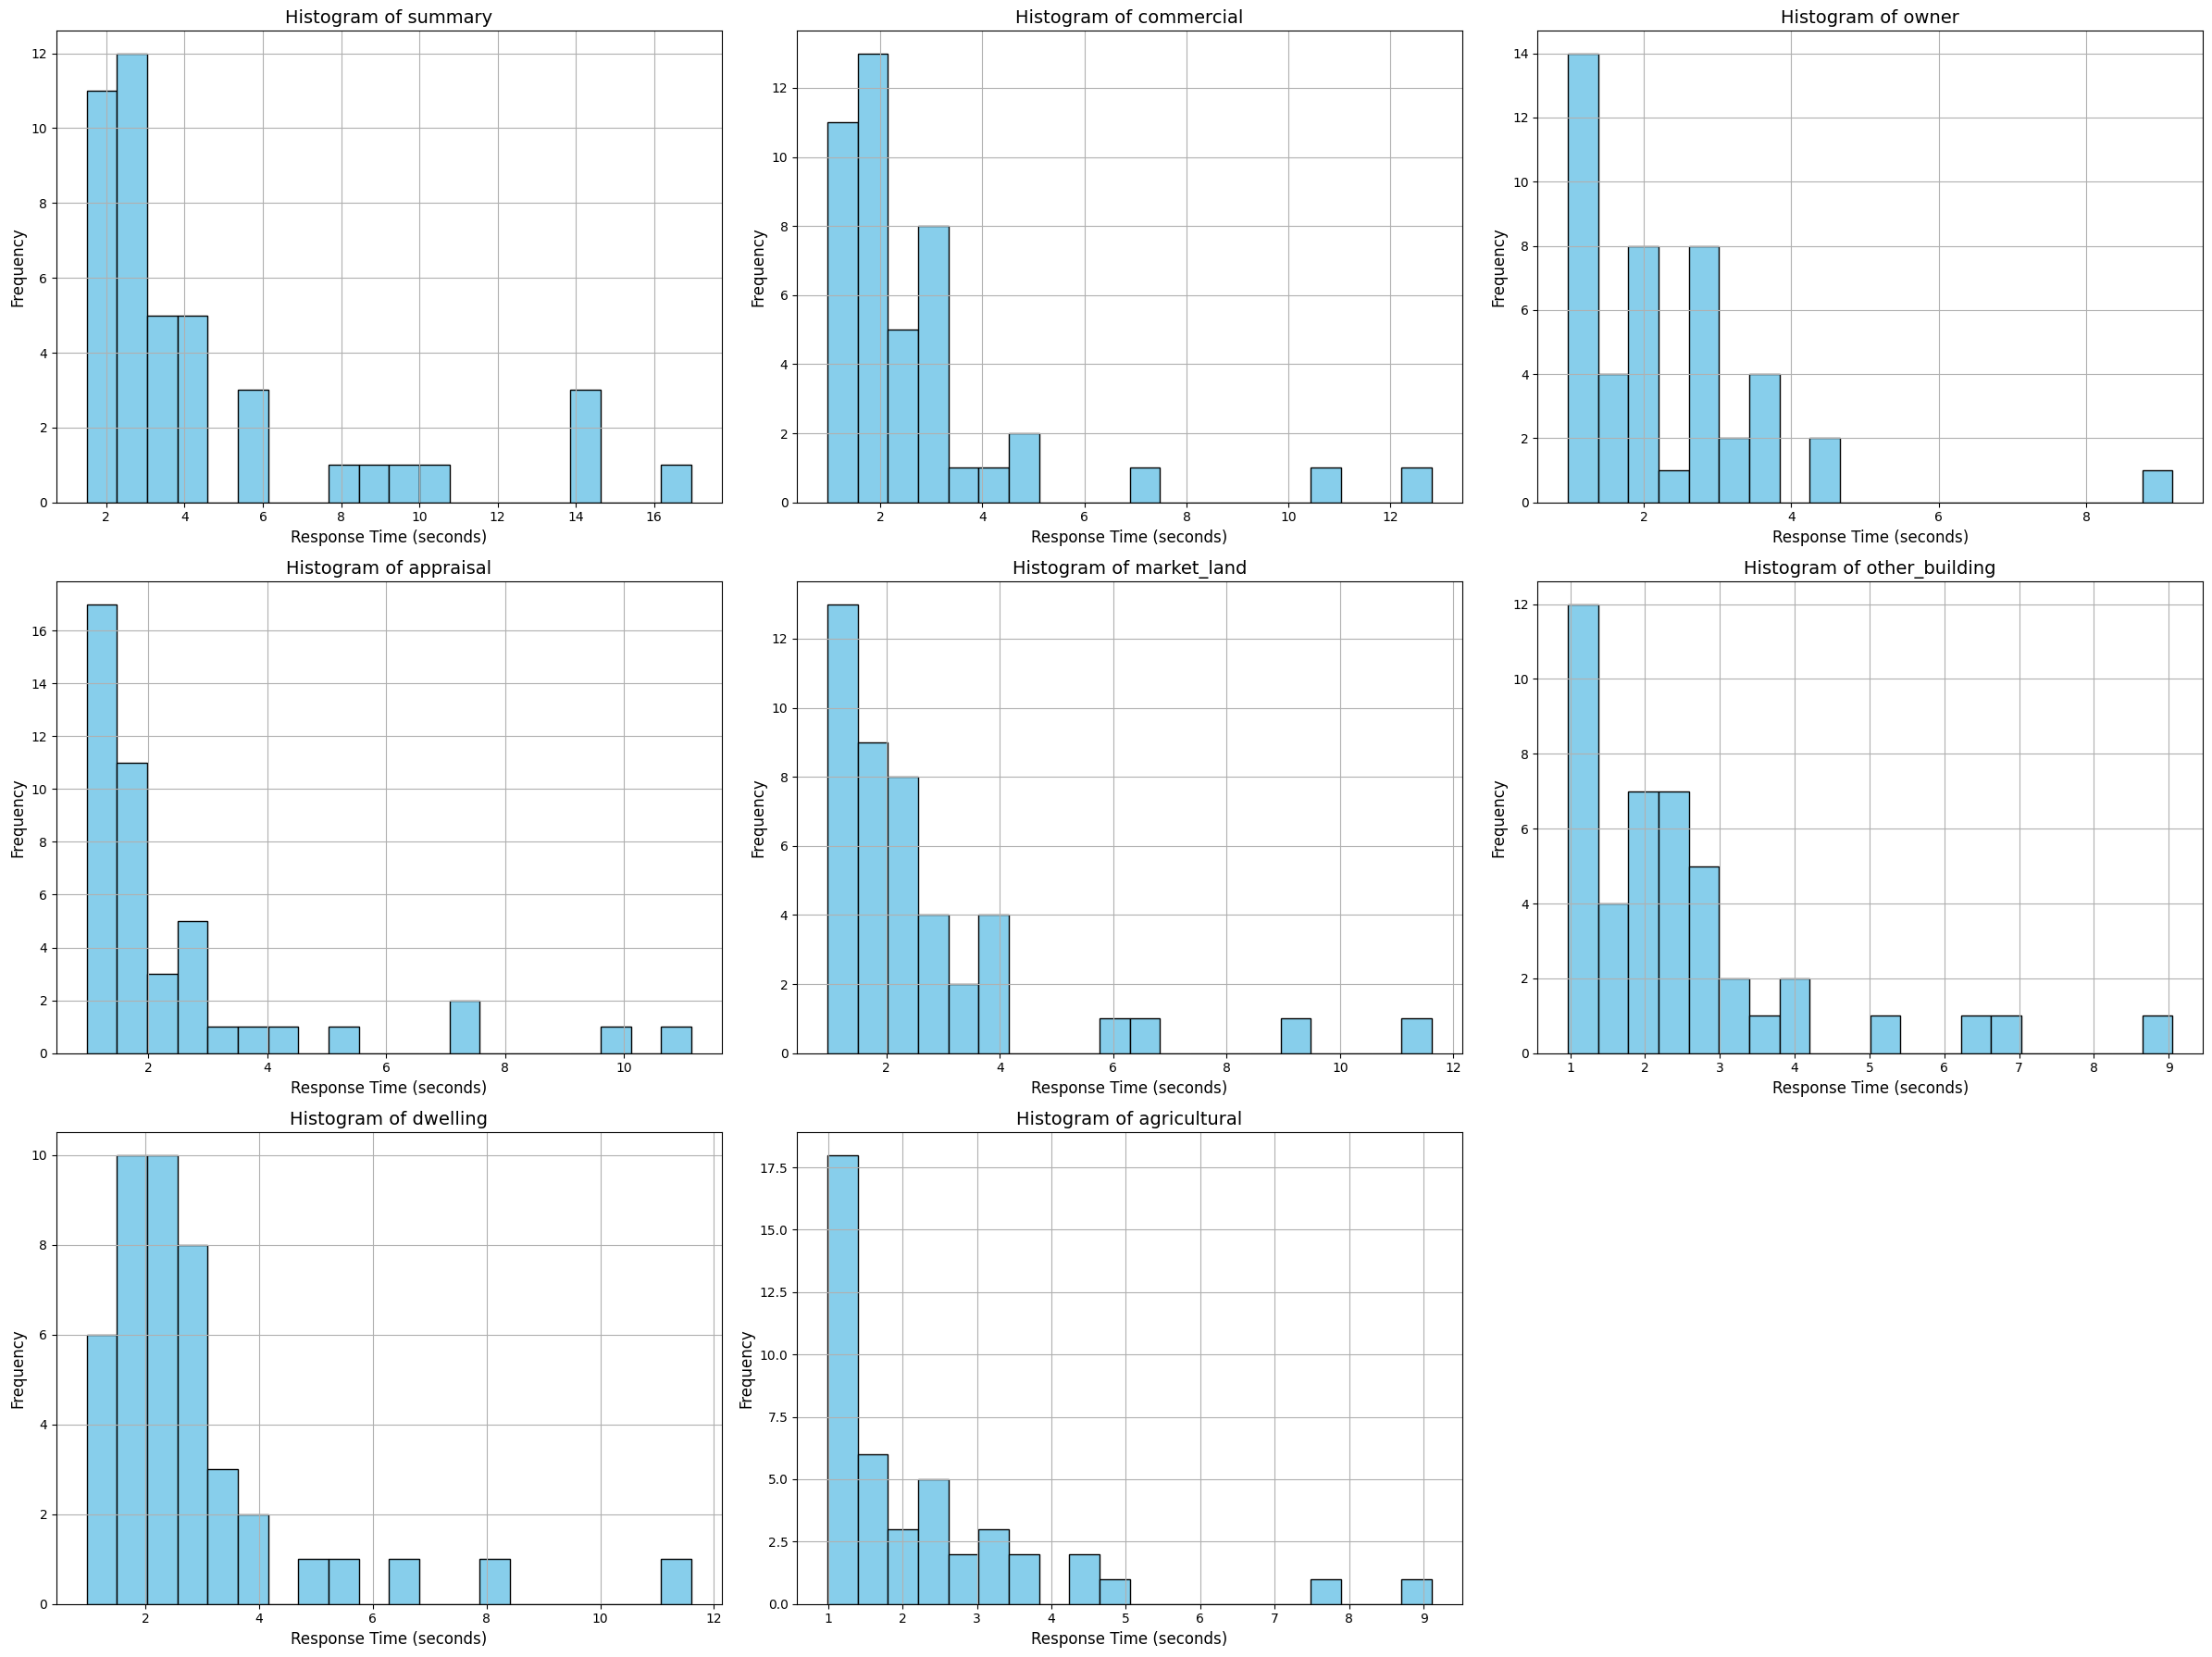

In [30]:
# Plot histograms for each API call
plt.figure(figsize=(24, 18))

# Loop through columns and create subplots
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    df[column].hist(bins=20, edgecolor='black', color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel('Response Time (seconds)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Correlation heatmap

To check if response times of certain API calls are correlated with others.




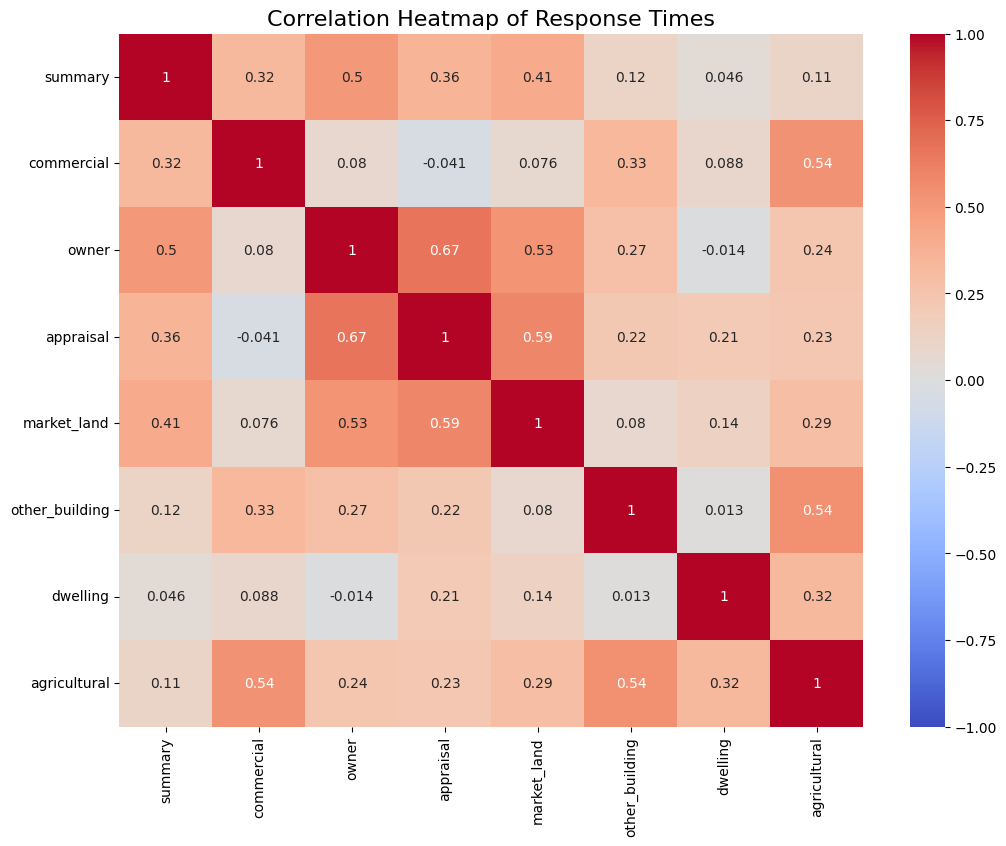

In [31]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Response Times', fontsize=16)
plt.show()

# Time series analysis

Provided we have timestamp data (we don't have this in the current dataset)

In [32]:
# TODO: Add time series analysis

# Density Plots:
These will show the distribution of response times for each API call, offering a smoothed version of the histogram.

1. Peaks in the density plot indicate common response times.
2. The width of the distribution gives an idea about the variability of the response times.

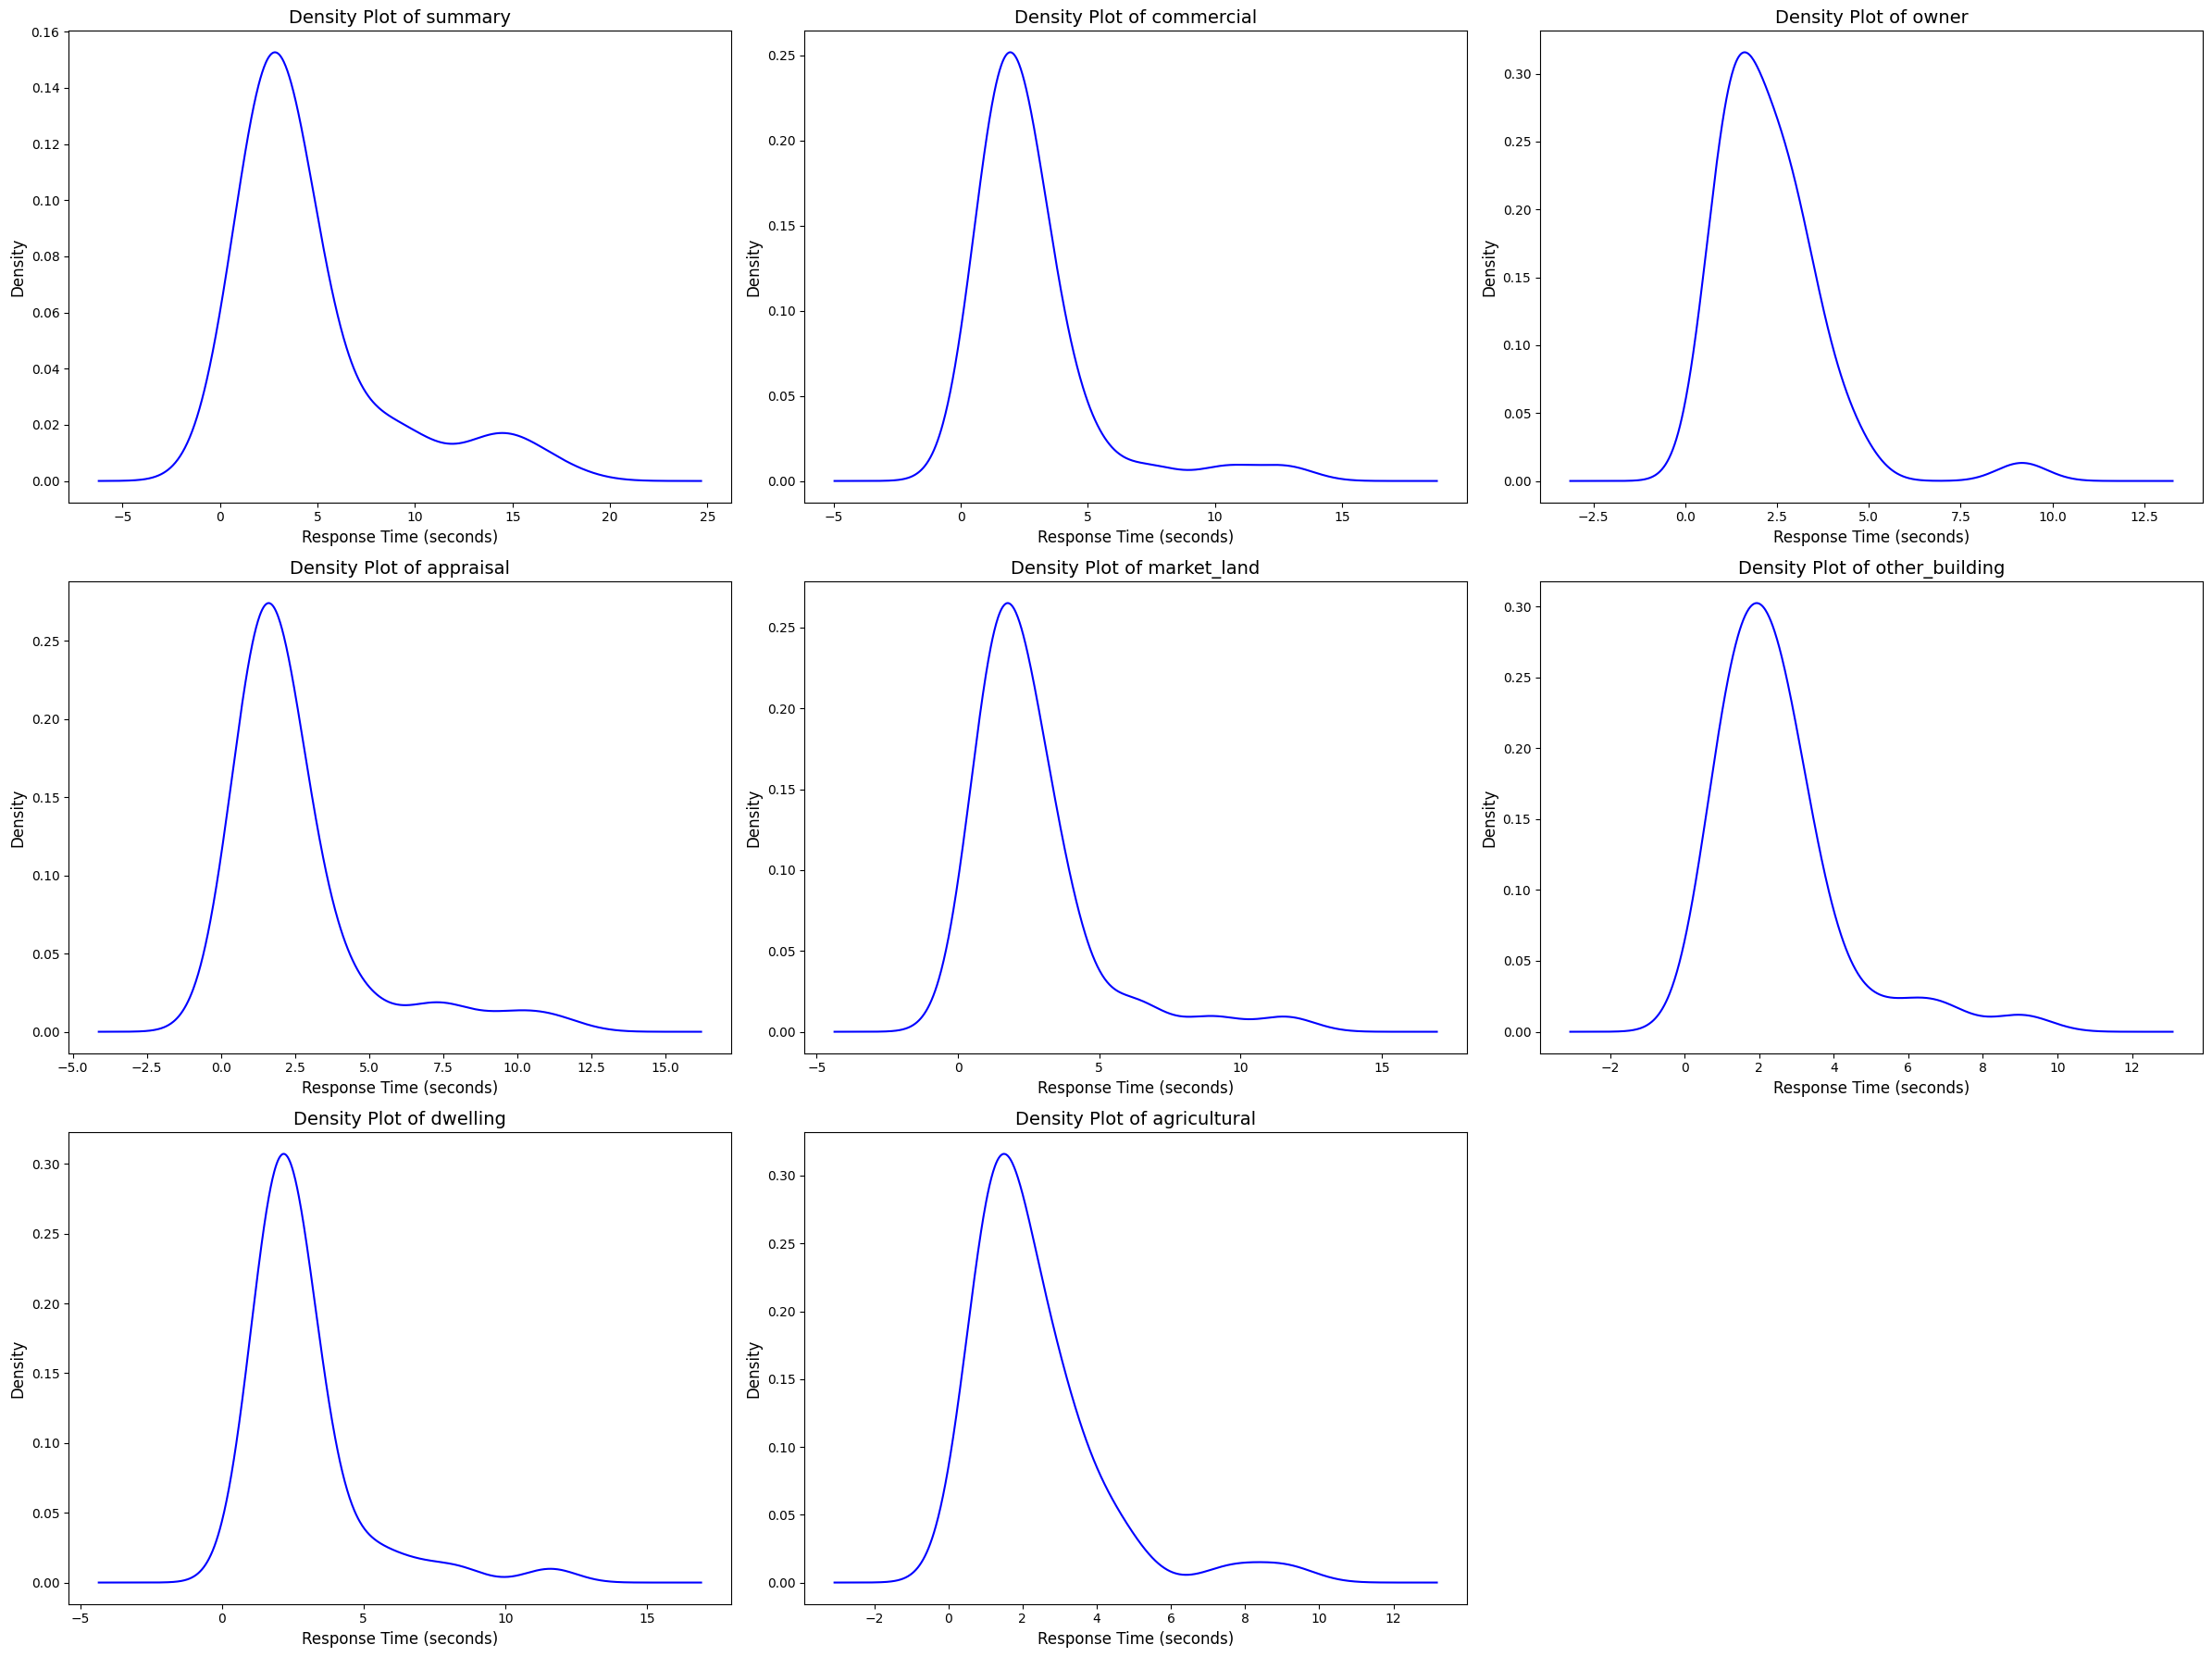

In [33]:
# Plot density plots for each API call
plt.figure(figsize=(24, 18))

# Loop through columns and create subplots
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    df[column].plot(kind='density', color='blue')
    plt.title(f'Density Plot of {column}', fontsize=14)
    plt.xlabel('Response Time (seconds)', fontsize=12)
    plt.ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

# Violin Plots:

These combine aspects of box plots and density plots, showcasing the distribution of the response times more clearly.


1. The white dot represents the median.
2. The thick bar in the center represents the interquartile range.
3. The thin line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.
4. The width of the plot at different values indicates the density of the data at that value, with wider sections representing higher density (more data points).
5. From the violin plots, we can observe the distribution and variability of response times for each API call more clearly.

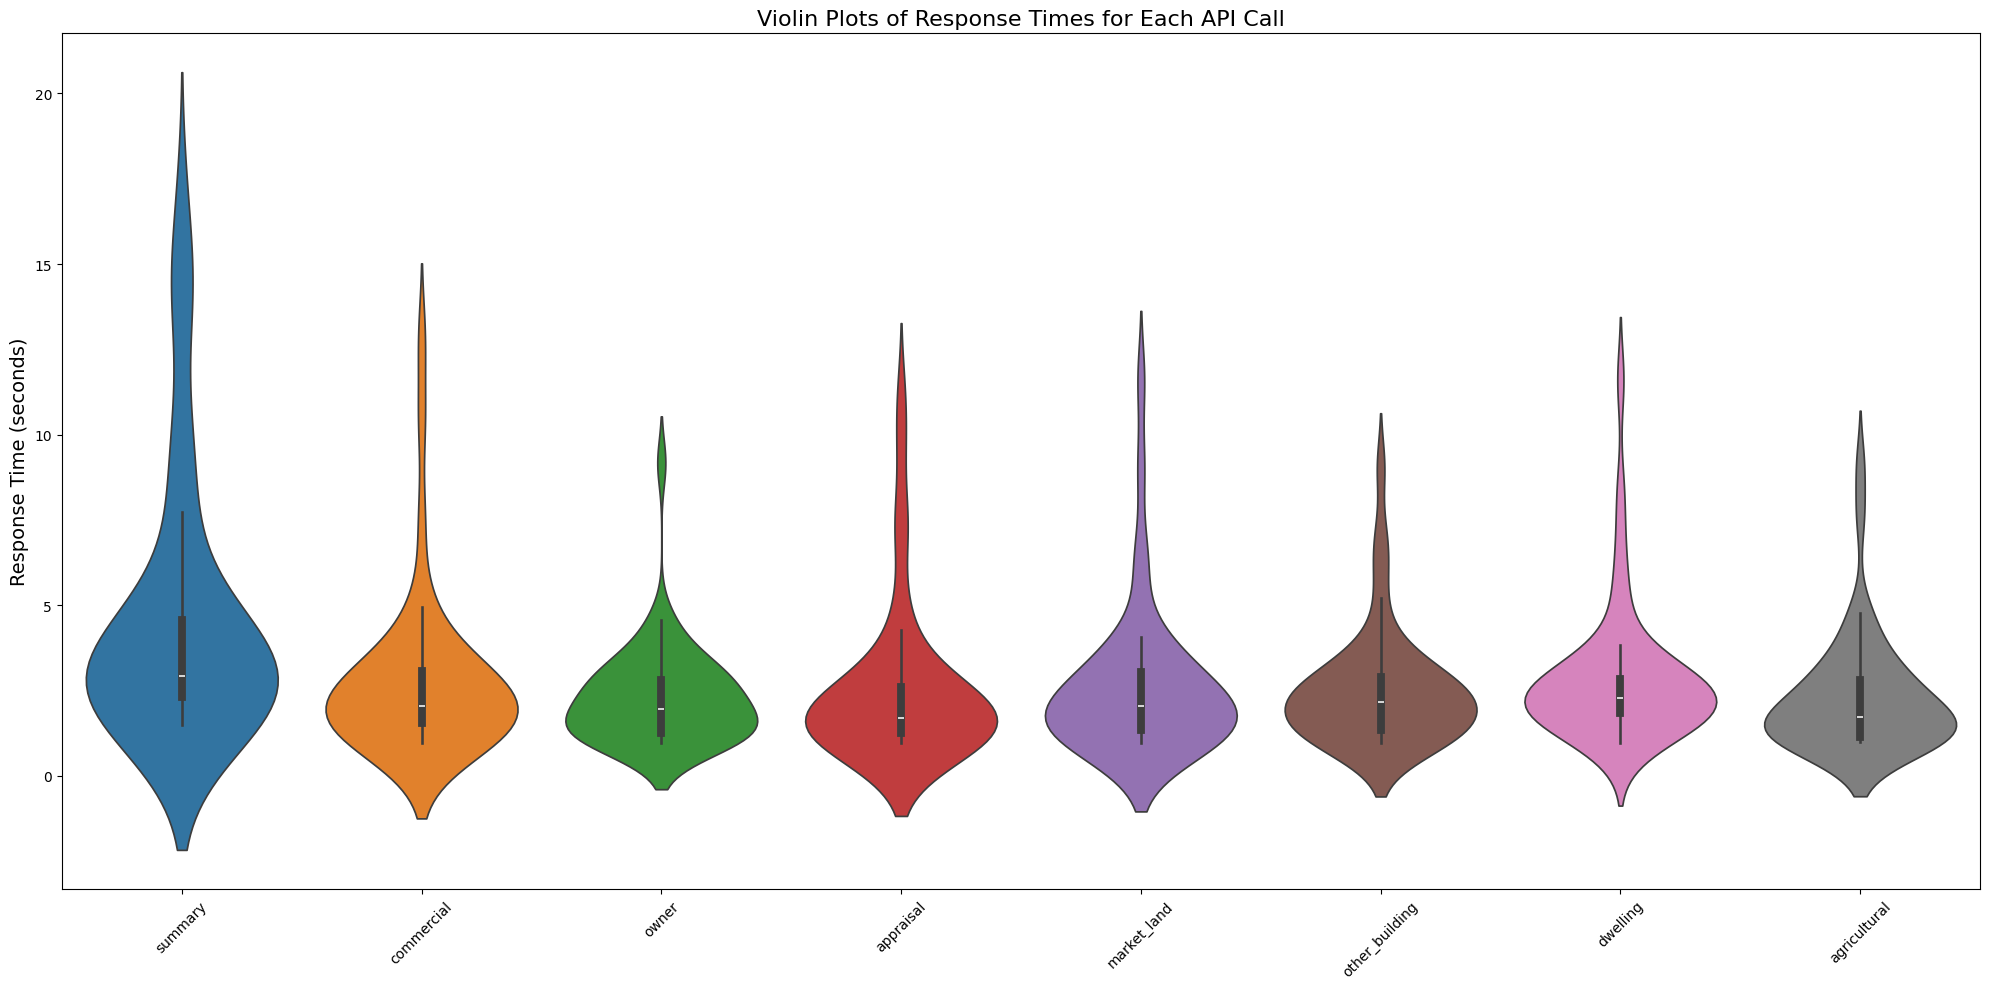

In [34]:
# Plot violin plots for each API call
plt.figure(figsize=(20, 10))
sns.violinplot(data=df)
plt.ylabel('Response Time (seconds)', fontsize=14)
plt.title('Violin Plots of Response Times for Each API Call', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cumulative Distribution Function (CDF) Plots:

These show the probability that a response time will be less than or equal to a particular value. It can be useful to understand what percentage of calls complete within a certain time frame.


1. The y-axis represents the probability that a response time will be less than or equal to the value on the x-axis.
2. For example, looking at the summary plot, you can determine the probability (percentage) that a response time will be less than a particular number of seconds.
3. The steeper sections of the plot indicate where most of the data is concentrated.

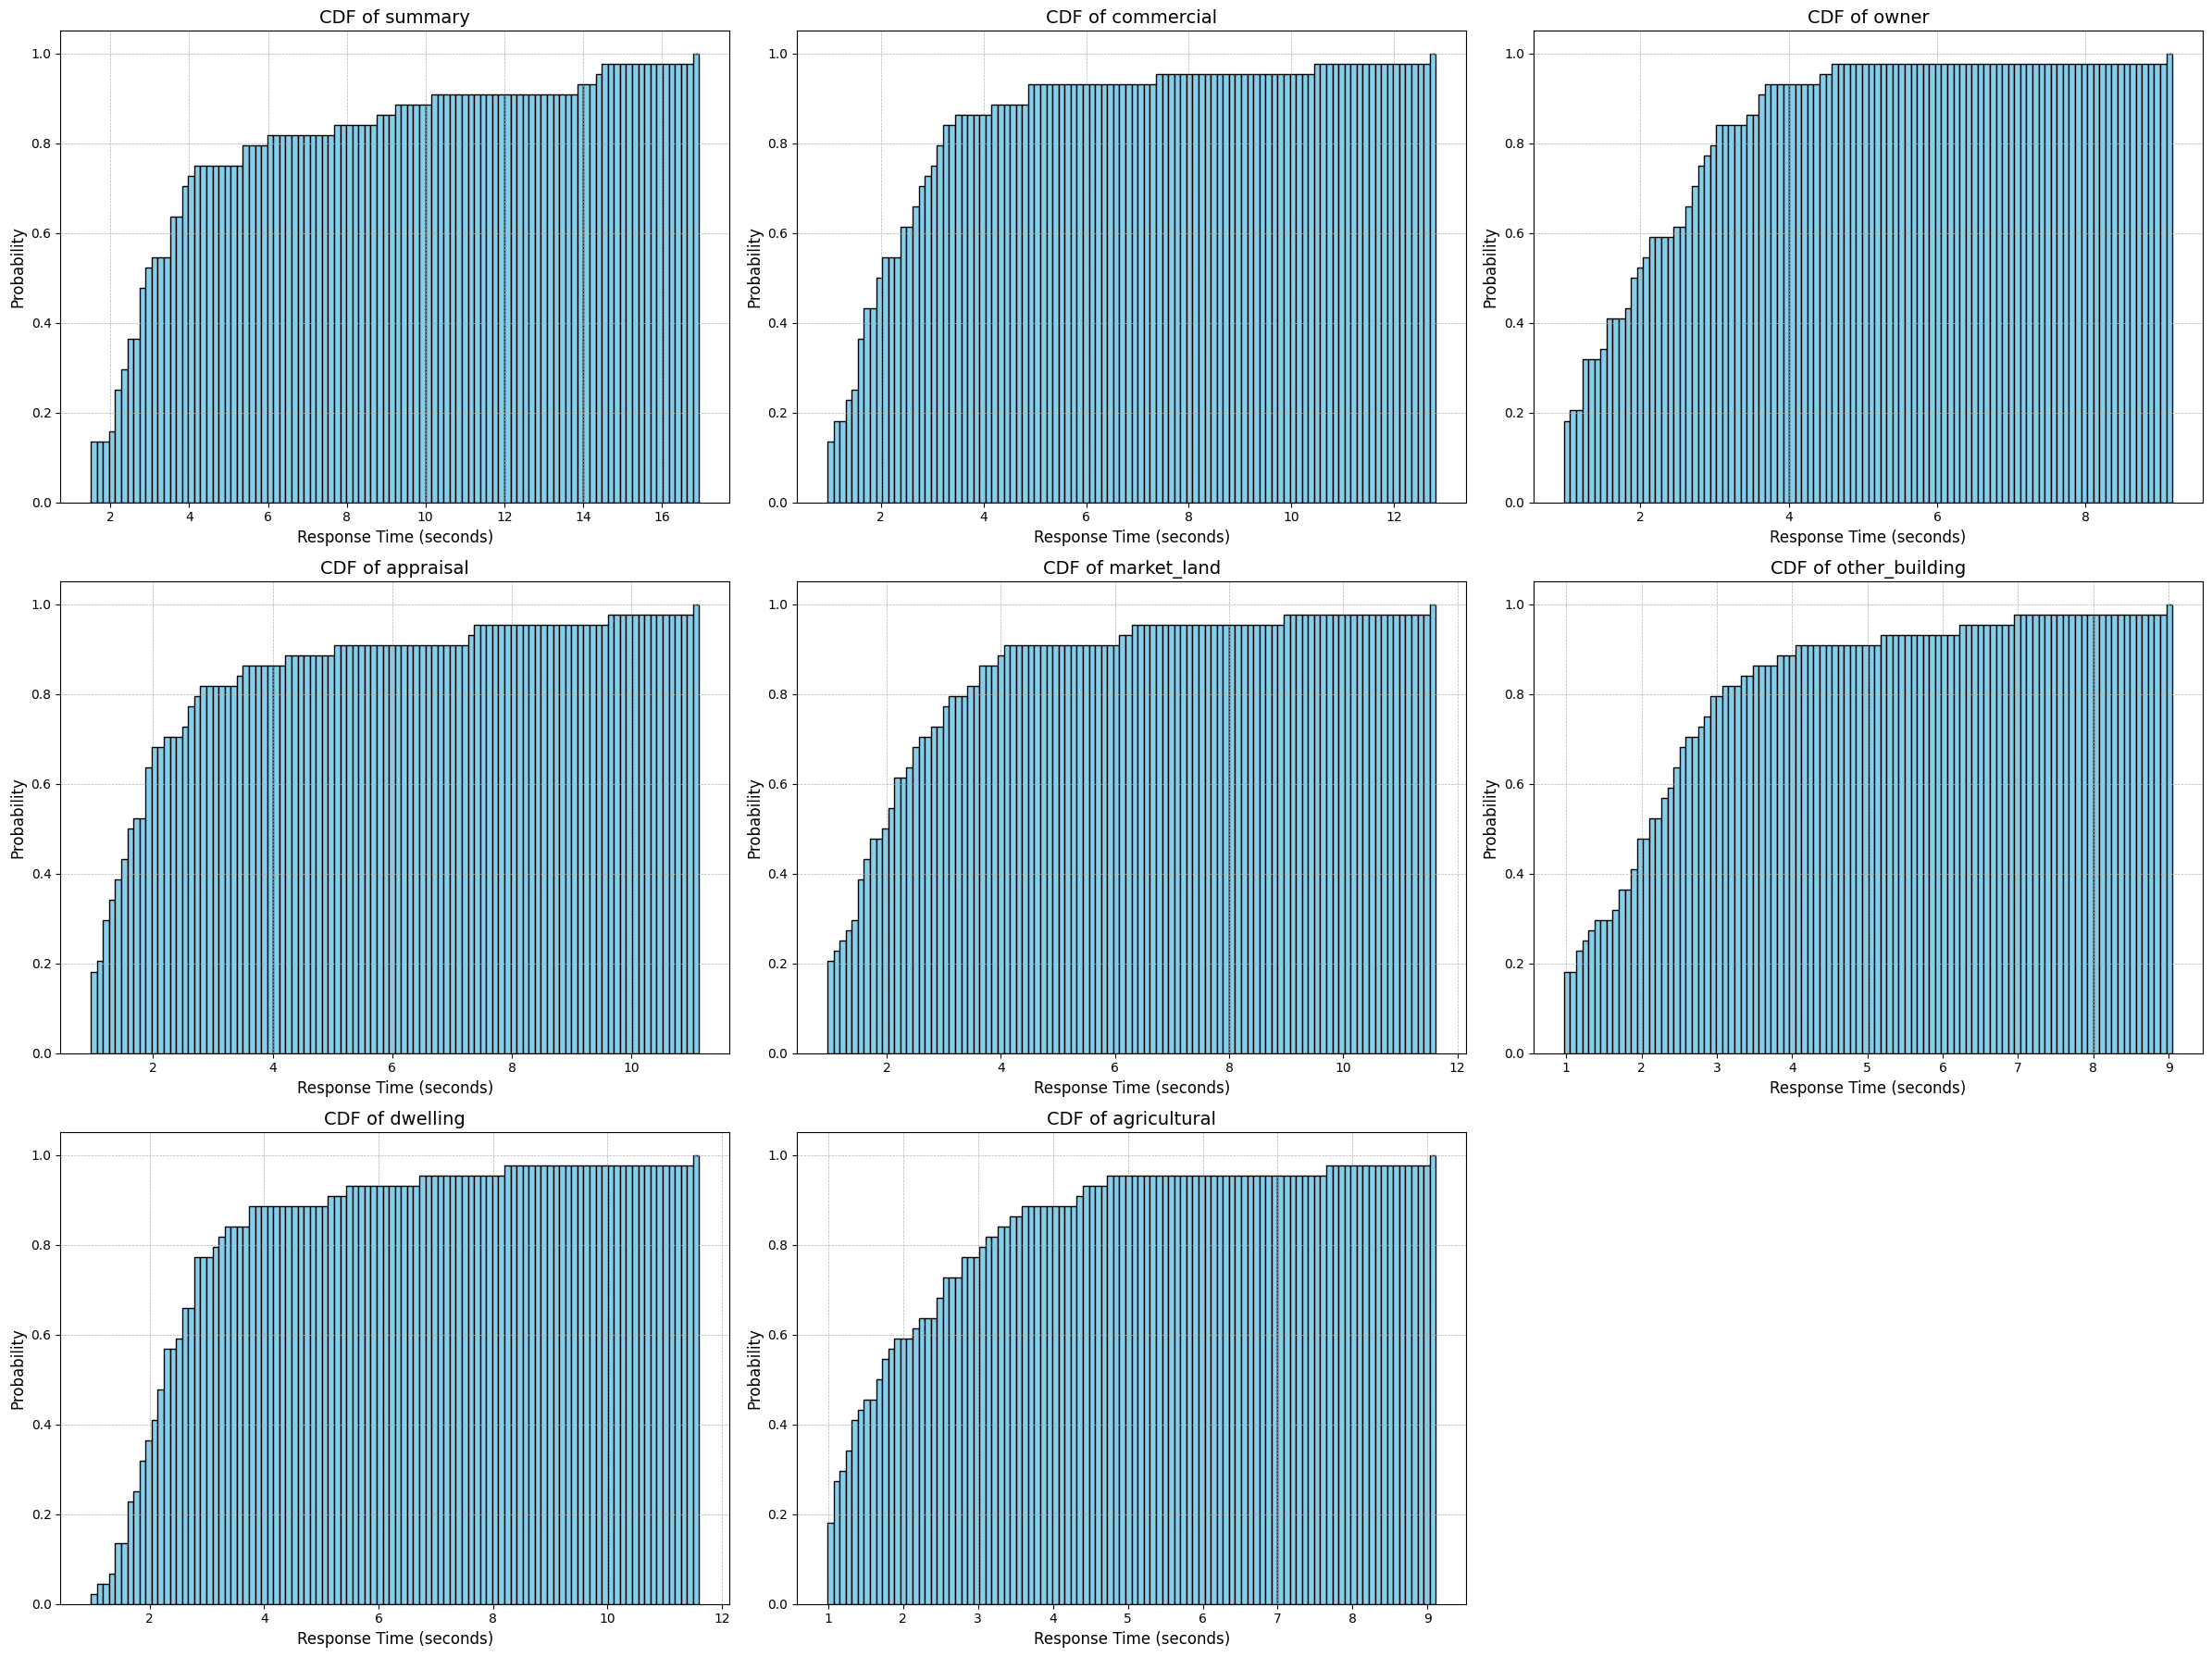

In [35]:
# Plot CDF for each API call
plt.figure(figsize=(24, 18))

# Loop through columns and create subplots
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    df[column].hist(cumulative=True, density=1, bins=100, color='skyblue', edgecolor='black')
    plt.title(f'CDF of {column}', fontsize=14)
    plt.xlabel('Response Time (seconds)', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()